In [2]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")

Started


In [3]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,

        njobs=1,
        verbose=1,
    )
)

In [5]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "2022.03.24/*search4*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')

print(len(run_data.settings_df))
run_data.settings_df.head()

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.24/*search4*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.24/*search4*/*: 8


loaded: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 72471.78it/s]


Added: 4
4


,path,fullpath,experiment_settings,experiment_settings_seed,clip_rewards,projection_dim,burn_in_length,nmodules,max_replay_size,sequence_period,...,num_parallel_calls,batch_size,evaluation_epsilon,bootstrap_n,num_epsilons,target_update_period,seed,max_gradient_norm,module_attn_heads,module_attn_size
0,"2022.03.24/agent=r2d1_farm,setting=large_respa...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.24,agent=r2d1_farm,setting=large_respa...","2022.03.24,agent=r2d1_farm,setting=large_respa...",False,16,0,4,100000,40,...,1,32,0.0,5,256,2500,1,80.0,0,64
1,"2022.03.24/agent=r2d1_farm,setting=large_respa...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.24,agent=r2d1_farm,setting=large_respa...","2022.03.24,agent=r2d1_farm,setting=large_respa...",False,16,0,4,100000,40,...,1,32,0.0,5,256,2500,1,80.0,0,64
2,"2022.03.24/agent=r2d1_farm,setting=large_respa...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.24,agent=r2d1_farm,setting=large_respa...","2022.03.24,agent=r2d1_farm,setting=large_respa...",False,16,0,4,100000,40,...,1,32,0.0,5,256,2500,1,80.0,0,64
3,"2022.03.24/agent=r2d1_farm,setting=large_respa...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.24,agent=r2d1_farm,setting=large_respa...","2022.03.24,agent=r2d1_farm,setting=large_respa...",False,16,0,4,100000,40,...,1,32,0.0,5,256,2500,1,80.0,0,64


In [6]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    # load_paths=True,
)

settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.76s/it]

Keys:
['r2d1/LearnerSteps',
 'r2d1/EvaluatorSteps',
 'r2d1/StepsPerSecond',
 'r2d1/ActorSteps',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/StepsPerSecond',
 'actor/EvaluatorSteps',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/LearnerSteps',
 'evaluator/ActorSteps',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/LearnerSteps']


In [7]:
Vistool?

Init signature:
Vistool(
    tensorboard_data,
    plot_settings=[],
    metadata_stats=['num_seeds'],
    metadata_settings_dict={},
    metadata_settings_list=[],
    filter_key=None,
    filter_column='max',
    key_with_legend=None,
    plot_data_kwargs={},
    common_settings={},
)
Docstring:      <no docstring>
File:           /mnt/brain5/scratch/wcarvalh/projects/rljax/vistools/tensorboard_vistools.py
Type:           type
Subclasses:     PanelTool


In [8]:
key_with_legend = 'evaluator/0.Task/-1,1,0,1/EpisodeReturn'
filter_key = '-1,1,0,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=key_with_legend,
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='max',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
    metadata_settings_list=['final_lr_scale', 'schedule_end'],
)

,num_seeds,final_lr_scale,schedule_end
0,2,0.000,0
1,2,0.000,30000
2,2,0.001,0
3,2,0.001,30000


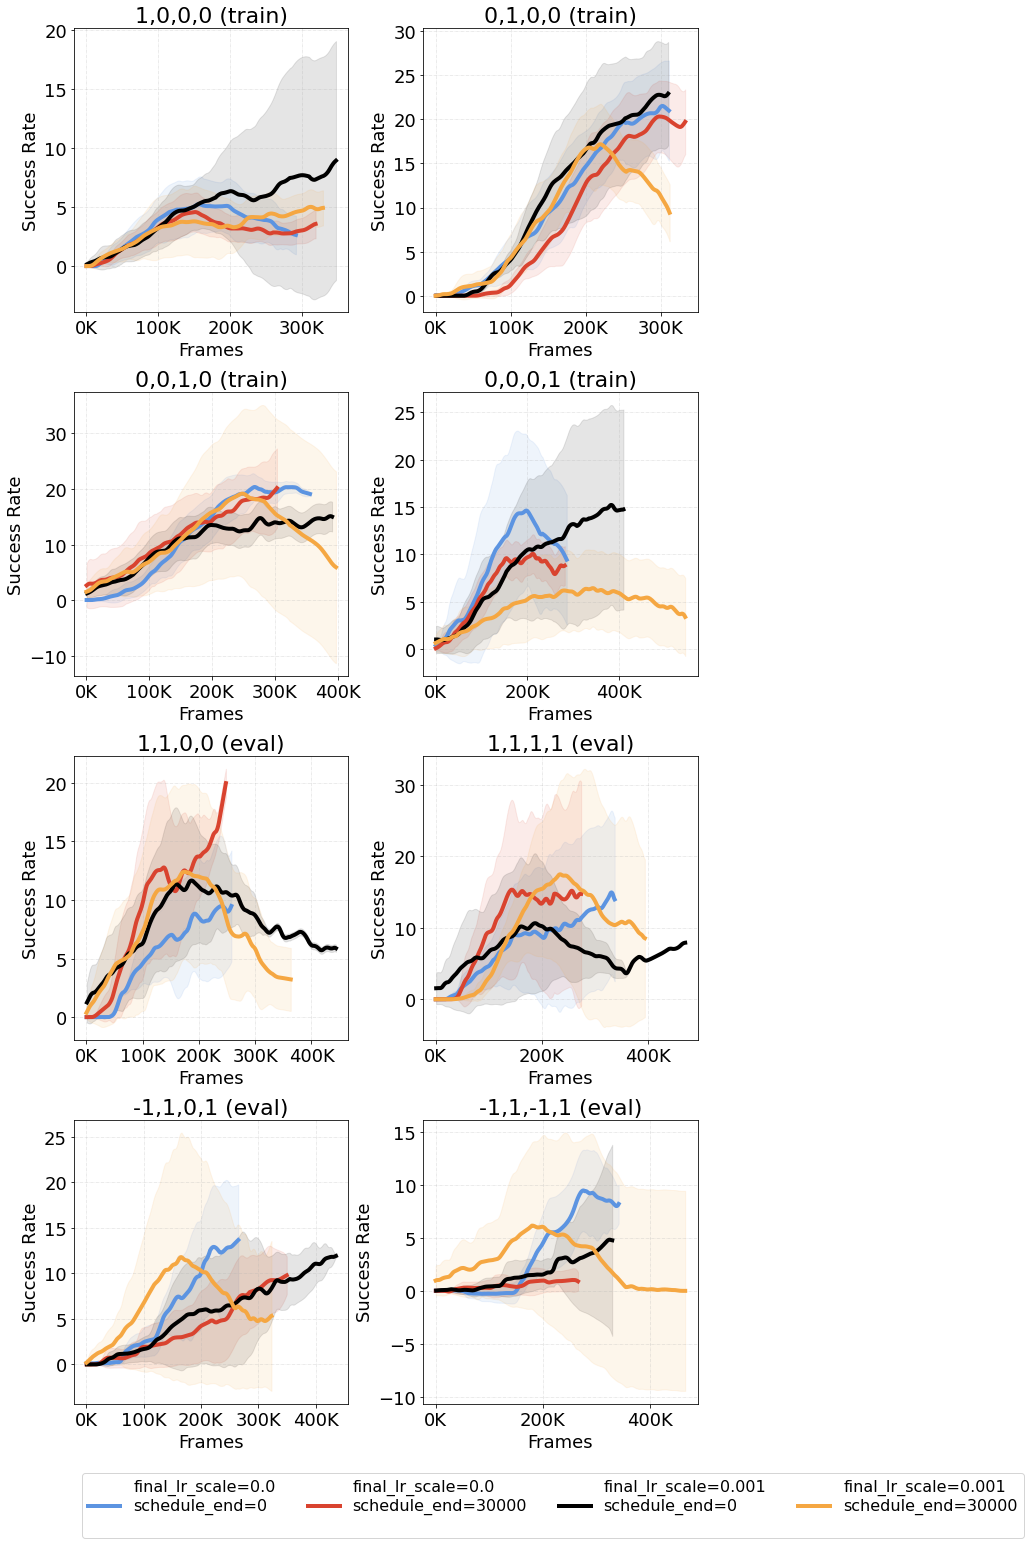

In [9]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=2,
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-.5), 
                ncol=4,
                ),
    data_filters = [
        dict(
            final_lr_scale=None,
            schedule_end=None,
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          n_samples=400,
                          rolling=150,
                          xmax=6e5,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)